In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shrinathgavadoji/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shrinathgavadoji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
train_df = pd.read_excel('/Users/shrinathgavadoji/Desktop/train.xlsx')

test_df = pd.read_excel('/Users/shrinathgavadoji/Desktop/test.xlsx')
train_df

,unique ID,query_text,category
0,0,HTTPS://VIMEO.COM/107297364﻿,junk
1,1,Art and Culture,general
2,2,Differentiate between chemical and biological ...,academic_servable
3,3,nth Term of an AP,academic_servable
4,4,bunmei kaika: aoiza ibunroku saien,junk
...,...,...,...
4995,4995,Under what conditions do we make septic tanks?,academic_servable
4996,4996,PSUS,general
4997,4997,Let's Travel Together Test - 1,general
4998,4998,"The given angle is - 240°. We know that, π=18...",academic_non_servable


In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unique ID   5000 non-null   int64 
 1   query_text  5000 non-null   object
 2   category    5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [36]:
# TO CHRCK NULL VALUES 
train_df['category'].isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: category, Length: 5000, dtype: bool

In [35]:
#TO VIEW TOP 5 ROWS
train_df.head()

,unique ID,query_text,category
0,0,HTTPS://VIMEO.COM/107297364﻿,junk
1,1,Art and Culture,general
2,2,Differentiate between chemical and biological ...,academic_servable
3,3,nth Term of an AP,academic_servable
4,4,bunmei kaika: aoiza ibunroku saien,junk


In [15]:
print(train_df['category'].value_counts())


academic_servable        1750
junk                     1000
general                  1000
academic_non_servable     750
conversational            500
Name: category, dtype: int64


In [34]:
train_df.columns

Index(['unique ID', 'query_text', 'category'], dtype='object')

# EDA

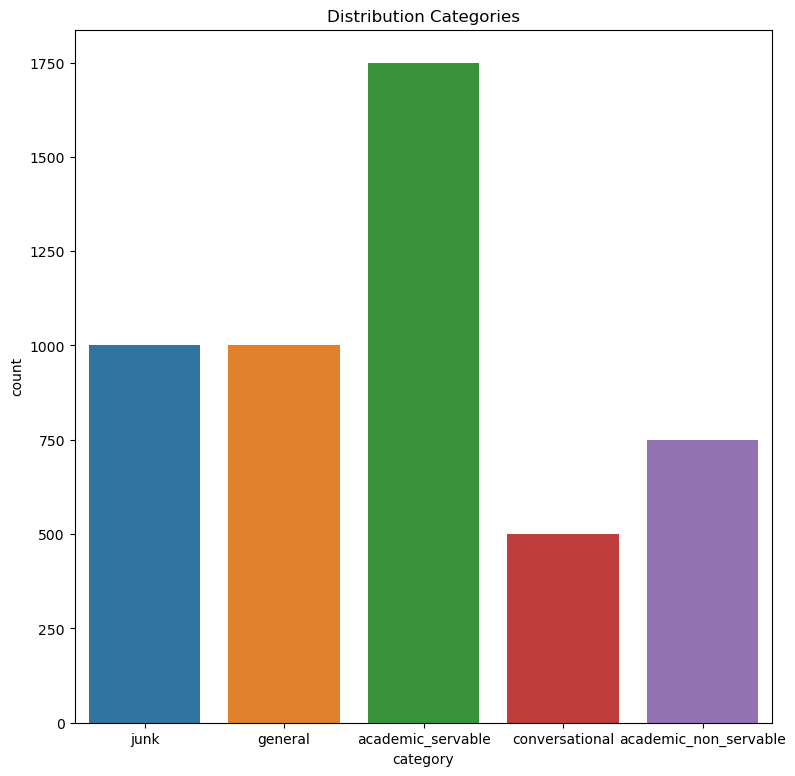

In [67]:
plt.figure(figsize=(9,9))
sns.countplot(x='category', data=train_df)
plt.title('Distribution Categories')
plt.show()

In [93]:
def preprocess_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenization
        tokens = word_tokenize(text)
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        # Join tokens back into text
        return ' '.join(tokens)
    else:
        return ''
# Apply preprocessing
data['clean_text'] = train_df['query_text'].apply(preprocess_text)
data

,unique ID,query_text,category,clean_text
314,314,introduction to coordinate geometry,academic_servable,introduction coordinate geometry
1800,1800,Is this app freee to use,academic_servable,app freee use
3999,3999,70. Three identical uniform rods each are acte...,academic_servable,70 three identical uniform rods acted two forc...
3746,3746,Human Health and Disease,academic_servable,human health disease
4621,4621,"In a polygon, there are 5 right angles and the...",academic_servable,polygon 5 right angles remaining angles equal ...
...,...,...,...,...
4962,4962,1370089 8710100049 1370089 रजि. नं. Regn.No. D...,junk,1370089 8710100049 1370089 रजि नं regnno d1206...
4966,4966,Jampack Volume 14 (RP-T),junk,jampack volume 14 rpt
4972,4972,"I'm trying to get a handle on lez,",junk,im trying get handle lez
4974,4974,Land of the Dead: Road to Fiddler's Green,junk,land dead road fiddlers green


In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame containing 'query_text' column
# Apply preprocessing to create 'clean_text' column
data['clean_text'] = train_df['query_text'].apply(preprocess_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], train_df['category'], test_size=0.2, random_state=42)

In [94]:
X_train

1182                                     lufia ruins lore
3364                      wondering know anything screwed
3788                            1 india extends latitudes
3231    comprehensive guide srmjeee ug chemistry appli...
1031                                         mad max 2015
                              ...                        
2097                          kdabfkaebflueqbfblfjqbwjlfb
2080                                    magnetic material
472          im interested learning topic trade relations
3792                      im trying wrap head around snap
4262    8 small hole area cross section 2 2 present ne...
Name: clean_text, Length: 4000, dtype: object

In [96]:
y_train

4227                  general
4676    academic_non_servable
800         academic_servable
3671        academic_servable
4193    academic_non_servable
                ...          
4426        academic_servable
466     academic_non_servable
3092                     junk
3772           conversational
860     academic_non_servable
Name: category, Length: 4000, dtype: object

In [85]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [86]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [90]:
from sklearn.model_selection import GridSearchCV

# hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Initialize model with best parameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train_tfidf, y_train)

Best Parameters: {'C': 0.001, 'penalty': 'l2'}


LogisticRegression(C=0.001)

In [92]:
from sklearn.metrics import classification_report

# Predictions
predictions = model.predict(X_test_tfidf)

# Classification report
print(classification_report(y_test, predictions))


                       precision    recall  f1-score   support

academic_non_servable       0.15      0.04      0.06       141
    academic_servable       0.34      0.80      0.47       332
       conversational       0.00      0.00      0.00       103
              general       0.29      0.09      0.13       229
                 junk       0.29      0.14      0.19       195

             accuracy                           0.32      1000
            macro avg       0.21      0.21      0.17      1000
         weighted avg       0.25      0.32      0.23      1000



In [88]:
# Save the model
import joblib
joblib.dump(model, 'text_classification_model.pkl')

# Later, load the model for predictions
loaded_model = joblib.load('text_classification_model.pkl')